# Lab 4.03 - Bivariate Analysis of Qualitative Data


In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Exercise 3 - Discrimination in schoolteacher hiring

African Americans in a St. Louis suburb sued the city 
claiming they were discriminated against in schoolteacher hiring. Of the city's population, 5.7% were 
African American; of 405 teachers in the school system, 15 were African American. Set up appropriate 
hypotheses and determine whether African Americans 
are underrepresented.  
Calculate the standardized residuals. 

Results of the main calculations:
- Chi-squared        χ² = 3.0027
- Critical value      g = 3.8415
- p-value             p = 0.0831
- standardized residuals for african american = -1.78328 > - 2

In [4]:
types =               ['african', 'other']
observed =   np.array([   15,      405 - 15])
expected_p = np.array([   .057,     1-.057])

alpha = 0.05               # Significance level
n = sum(observed)          # Sample size
k = len(observed)          # Number of categories
dof = k - 1                # Degrees of freedom
expected = expected_p * n  # Expected absolute frequencies in the sample
g = stats.chi2.isf(alpha, df=dof)  # Critical value

# Goodness-of-fit-test in Python:
chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)

print("Significance level  ⍺ = %.2f" % alpha)
print("Sample size         n = %d" % n)
print("k = %d; df = %d" % (k, dof))
print("Chi-squared        χ² = %.4f" % chi2)
print("Critical value      g = %.4f" % g)
print("p-value             p = %.4f" % p)

Significance level  ⍺ = 0.05
Sample size         n = 405
k = 2; df = 1
Chi-squared        χ² = 3.0027
Critical value      g = 3.8415
p-value             p = 0.0831


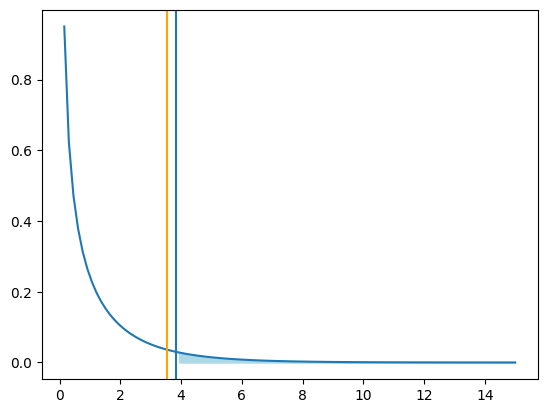

In [3]:
# Plot of the case:
# x-values:
x = np.linspace(0, 15, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=dof)
# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(alpha, df=dof)

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange')  # chi-squared

In [6]:
stdres = (observed - expected) / np.sqrt(expected * (1 - expected_p))
print(types)
print(stdres)

['african', 'other']
[-1.73284309  1.73284309]
